<a href="https://colab.research.google.com/github/mobley-trent/kaggle/blob/master/twitter_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TWITTER DATA MINING

Welcome to my Google Colab notebook where I will be analyzing my liked tweets using Twitter API. In this project, I will be exploring the content of my liked tweets by creating a word cloud and performing topic modeling.

Twitter has become an essential platform for communication and information sharing. As Twitter users, we come across numerous tweets daily, and sometimes we like or favorite these tweets to save them for future reference or simply show appreciation. Analyzing these liked tweets can reveal our interests, opinions, and even our personality.

In this project, I will use Python, Tweepy API, and Gensim library to collect my liked tweets, preprocess the data, and perform topic modeling to uncover the latent topics in my tweets. I will also create a word cloud to visualize the most frequent words in my liked tweets.

Join me on this journey as we explore the content of my liked tweets and uncover the topics that interest me the most.

In [ ]:
!pip install git+https://github.com/tweepy/tweepy.git

We use the above code to make sure that the Tweepy module is up to date.

In [1]:
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt

In [2]:
import re

def remove_https_links(string: str) -> str:
    # The regular expression to match HTTPS links
    pattern = r'https://[^\s]+'
    
    # Remove the links using the `re.sub()` function
    result = re.sub(pattern, '', string)
    
    # Return the result
    return result


def remove_emojis(string: str) -> str:
    # The regular expression to match emojis
    pattern = r'[^\x00-\x7F\x80-\xFF\u0100-\u017F\u0180-\u024F\u1E00-\u1EFF]'
    
    # Remove the emojis using the `re.sub()` function
    result = re.sub(pattern, '', string)
    
    # Return the result
    return result

def apply_funcs(x):
    return remove_emojis(remove_https_links(x))

The above functions utilize regular expressions to preprocess the tweets and clean the data.

## TWITTER API

In [4]:
from google.colab import files

# # Upload file
uploaded = files.upload()

# Read file and extract keys
with open('twitter_keys.txt', 'r') as f:
    keys = {}
    for line in f:
        if line == '\n': continue
        key, value = line.strip().split(' - ')
        keys[key] = value

# Store keys in variables
API_key = keys['API key']
API_secret_key = keys['API Secret key']
Bearer_token = keys['Bearer Token']
Access_token = keys['Access Token']
Access_token_secret = keys['Access Token Secret']

Saving twitter_keys.txt to twitter_keys (1).txt


Upload a txt file containing the twitter keys defined above. You can obtain them when you create a Twitter Developer Account.

In [5]:
import tweepy

auth = tweepy.OAuthHandler(
   API_key, API_secret_key, Access_token, Access_token_secret
)

api = tweepy.API(auth)

In [6]:
twitter_client = tweepy.Client(auth)

We use Tweepy to authenticate and connect to the Twitter API using the developer credentials from the txt file (API key, API secret key, Access token, and Access token secret).

The `OAuthHandler` object is created and passed the four authentication credentials as parameters to authenticate the application. API object is created from the authenticated handler to interact with Twitter API endpoints.

Finally, `Client` object is created using the same authentication credentials to interact with Twitter API endpoints. Note that `Client` is a new feature in Tweepy version 4 that provides a simpler and more intuitive interface for making requests to the Twitter API.

In [7]:
likes = api.get_favorites(count=200)

author = []
likes_lst = []
time_created = []

for like in likes:
    likes_lst.append(like.text)
    author.append(like.author.name)
    time_created.append(like.created_at)

df = pd.DataFrame({
    'Liked Tweets':likes_lst,
    'Author':author,
    'Time Created':time_created
})

df['Liked Tweets'] = df['Liked Tweets'].apply(apply_funcs)
df['Author'] = df['Author'].apply(remove_emojis)

df.head()

,Liked Tweets,Author,Time Created
0,,ShitpostGateway,2023-03-03 13:53:05+00:00
1,DM zangu labda mtu aniexpose nikiomba odds,magarrazz,2023-03-03 11:42:35+00:00
2,"Nunez, Antony, Mudryk ext all get corned on a ...",zak,2023-03-03 11:04:37+00:00
3,"Good morning @JaneMarriottUK, I hope you'll be...",Aburi,2023-03-03 06:23:37+00:00
4,What do any of these people know about food se...,Beth Kasinga,2023-03-03 06:18:23+00:00


This code is using the Tweepy API to retrieve the last 200 tweets that the authenticated user has liked on Twitter. It then creates a Pandas dataframe with columns for the text of the liked tweets, the author name, and the time that the tweet was created.

The code then applies two functions to clean up the data in the `Liked Tweets` and `Author` columns. Specifically, it applies the function `apply_funcs` to the `Liked Tweets` column, which contains a series of text cleaning functions to standardize the text and remove unwanted characters. The `remove_emojis` function is applied to the `Author` column, likely to remove any emoji characters in the author names.

Finally, the first five rows of the cleaned dataframe are printed using the `head()` method.

## WORD CLOUD

In [8]:
text = df['Liked Tweets'].tolist()
text = ' '.join(text)

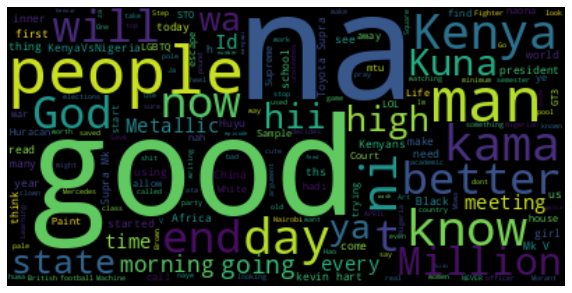

In [9]:
# Create the wordcloud object
wordcloud = wordcloud.WordCloud().generate(text)

# Display the wordcloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This code generates a wordcloud from the `Liked Tweets` column of a pandas dataframe.

First, the text from the `Liked Tweets` column is extracted into a list and then joined into a single string variable called `text`.

Next, a wordcloud object is created using the `wordcloud` library. The `generate()` method of the WordCloud object is called on the `text` variable to generate the wordcloud.

Finally, the wordcloud is displayed using `matplotlib` library.

## TOPIC MODELLING

Topic modeling is a technique used in natural language processing and machine learning to extract underlying topics or themes from a large collection of text documents. It involves identifying patterns in words and their co-occurrence within a corpus of text and then clustering them together to form topics. Topic modeling is useful in many applications, such as document classification, content recommendation, and sentiment analysis. It is commonly used in social media analysis, including Twitter data, to extract insights from large volumes of unstructured text data.

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer

# preprocess the text data
def preprocess_text(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS:
            result.append(token)
    return result

df['preprocessed_text'] = df['Liked Tweets'].apply(preprocess_text)

# create a dictionary of the preprocessed text
dictionary = gensim.corpora.Dictionary(df['preprocessed_text'])

# create a document-term matrix using the dictionary
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df['preprocessed_text']]

# apply LDA to the document-term matrix
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=doc_term_matrix,
    id2word=dictionary,
    num_topics=5,
    random_state=42,
    passes=10,
    per_word_topics=True
)


The code provided preprocesses the text data from the `Liked Tweets` column of the DataFrame by removing stop words and tokenizing the text using the gensim library. Next, a dictionary is created from the preprocessed text, which is a mapping between words and their integer ids. A document-term matrix is then created from the dictionary, which represents the frequency of words in the preprocessed text.

Finally, **Latent Dirichlet Allocation (LDA)** is applied to the document-term matrix to identify the underlying topics in the data. LDA is a popular algorithm for topic modelling that is used to identify a set of topics and their corresponding word distributions that best represent the given corpus of documents. In this code, LDA is applied to the document-term matrix with five topics, a random state of 42, and ten passes through the dataset. The resulting topics and their top words are printed out.

In [11]:
# print the topics and the top words in each topic
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx}')
    print(f'Top words: {topic}\n')

Topic: 0
Top words: 0.012*"na" + 0.007*"like" + 0.007*"ths" + 0.007*"toyota" + 0.007*"mk" + 0.007*"supra" + 0.005*"huyu" + 0.005*"kennar" + 0.005*"feed" + 0.005*"work"

Topic: 1
Top words: 0.010*"think" + 0.007*"kenyavsnigeria" + 0.007*"state" + 0.007*"id" + 0.007*"war" + 0.007*"escape" + 0.007*"april" + 0.007*"country" + 0.007*"lol" + 0.007*"wake"

Topic: 2
Top words: 0.011*"na" + 0.009*"man" + 0.007*"going" + 0.007*"kuna" + 0.007*"ya" + 0.005*"ni" + 0.005*"kama" + 0.005*"day" + 0.005*"million" + 0.005*"today"

Topic: 3
Top words: 0.017*"people" + 0.014*"like" + 0.011*"good" + 0.006*"high" + 0.006*"know" + 0.006*"kevin" + 0.006*"hart" + 0.006*"kenyans" + 0.006*"better" + 0.006*"end"

Topic: 4
Top words: 0.006*"good" + 0.006*"god" + 0.006*"read" + 0.006*"started" + 0.006*"look" + 0.006*"decides" + 0.006*"looking" + 0.006*"gotta" + 0.006*"million" + 0.006*"china"



The output the top words for each of the identified topics. Each line represents a topic, and the words and their weights are listed in descending order of importance. The number to the left of each word indicates the weight of the word in the topic, so a higher number means that the word is more important in that topic.

To interpret the results, you can look at the top words for each topic and try to identify the common theme or concept that they represent. For example, in the output you provided, topic 0 seems to be related to cars ("toyota", "supra"), while topic 3 seems to be related to positivity ("good", "better", "like"). However, it's important to note that these are just examples and the actual interpretation may vary depending on the specific data and the topic modelling technique used.